<a href="https://colab.research.google.com/github/Aryasreeg/Aryasreeg/blob/main/Detection_image_emotion_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np
import pandas as pd

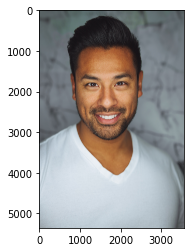

In [ ]:
img=image.load_img('/content/joseph-gonzalez-iFgRcqHznqg-unsplash.jpg')
plt.imshow(img)

In [ ]:
cv2.imread('/content/joseph-gonzalez-iFgRcqHznqg-unsplash.jpg').shape

(5354, 3569, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading images as train and test

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_data=train.flow_from_directory('/content/drive/MyDrive/Pictures/Training dataset',
                                     target_size=(200,200),
                                     batch_size=3)

Found 49 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'angry': 0, 'happy': 1, 'sad': 2}

In [ ]:
val_data=validation.flow_from_directory('/content/drive/MyDrive/Pictures/validation',
                                     target_size=(200,200))
                                     

Found 16 images belonging to 3 classes.


In [ ]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [ ]:
class_names=['angry','sad','happy']

# Model building (CNN Classifier)

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='sigmoid')
                                  ])


In [ ]:
model.compile(loss= 'categorical_crossentropy' ,optimizer=RMSprop(learning_rate=0.001), metrics=[ 'accuracy'])

In [ ]:
model_fitting=model.fit(train_data,steps_per_epoch=5, 
                           epochs=10,validation_data=val_data)

Epoch 1/10
5/5 [==============================] - 22s 5s/step - loss: 4.4307 - accuracy: 0.2308 - val_loss: 1.0165 - val_accuracy: 0.4375
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 1.3165 - accuracy: 0.3077 - val_loss: 1.0817 - val_accuracy: 0.5625
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 1.4205 - accuracy: 0.5385 - val_loss: 1.0647 - val_accuracy: 0.5625
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 1.1720 - accuracy: 0.2667 - val_loss: 1.0187 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 0.9757 - accuracy: 0.5333 - val_loss: 1.0914 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: 0.9943 - accuracy: 0.6000 - val_loss: 1.6031 - val_accuracy: 0.3750
Epoch 7/10
5/5 [==============================] - 12s 3s/step - loss: 1.2945 - accuracy: 0.5385 - val_loss: 0.8237 - val_accuracy: 0.6250
Epoch 8/10
5/5 [==================

In [ ]:
test=ImageDataGenerator(rescale=1/255)

test_data=test.flow_from_directory('/content/drive/MyDrive/Pictures/Testing data',
                                     target_size=(200,200))

Found 11 images belonging to 3 classes.


In [ ]:
test_dataset='/content/drive/MyDrive/Pictures/Testing data'

In [ ]:
import glob as gb

In [ ]:
for folder in os.listdir(test_dataset):
  files=gb.glob(pathname=str(test_dataset+'/'+folder+'/*.jpg'))
  print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 3 in folder happy
For testing data, found 3 in folder sad
For testing data, found 5 in folder angry


In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
                                  ])

In [ ]:
model.compile(loss= 'categorical_crossentropy' ,optimizer=RMSprop(learning_rate=0.001), metrics=[ 'accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 23, 23, 64)     

In [ ]:
history=model.fit(train_data,steps_per_epoch=5, 
                           epochs=15,validation_data=test_data)

Epoch 1/15
5/5 [==============================] - 19s 4s/step - loss: 0.1774 - accuracy: 0.9333 - val_loss: 2.3029 - val_accuracy: 0.3636
Epoch 2/15
5/5 [==============================] - 13s 3s/step - loss: 0.1747 - accuracy: 0.9333 - val_loss: 2.9861 - val_accuracy: 0.2727
Epoch 3/15
5/5 [==============================] - 12s 3s/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 4.0160 - val_accuracy: 0.2727
Epoch 4/15
5/5 [==============================] - 13s 3s/step - loss: 0.4810 - accuracy: 0.8000 - val_loss: 2.0521 - val_accuracy: 0.2727
Epoch 5/15
5/5 [==============================] - 12s 3s/step - loss: 0.1834 - accuracy: 1.0000 - val_loss: 3.2148 - val_accuracy: 0.3636
Epoch 6/15
5/5 [==============================] - 12s 3s/step - loss: 0.0404 - accuracy: 1.0000 - val_loss: 2.4434 - val_accuracy: 0.3636
Epoch 7/15
5/5 [==============================] - 12s 3s/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 3.4946 - val_accuracy: 0.3636
Epoch 8/15
5/5 [==================

In [ ]:
from tensorflow import keras
model.save('model1.h5') 

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 6s 6s/step - loss: 3.3461 - accuracy: 0.2727


[3.3461005687713623, 0.27272728085517883]

Text(0, 0.5, 'Loss')

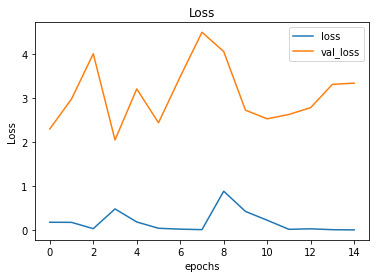

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

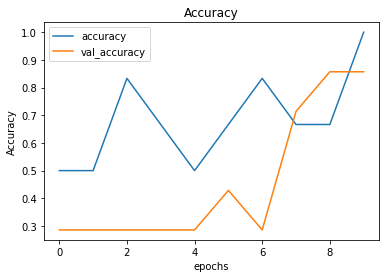

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

# **Model created for predicting new test images**

In [ ]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/1651237964441.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((200, 200))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1

In [ ]:
train_data.class_indices

{'angry': 0, 'happy': 1, 'sad': 2}